**Laboratorio 2**

Autor: Juan Nicolas Garcia Esquibel

Código: 201717860


# **FinanzasAlpes**


In [52]:
# =========================
# 1. IMPORTACIÓN DE LIBRERÍAS
# =========================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Algoritmos de clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Módulos para preprocesamiento y evaluación
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    silhouette_samplesaglomerativo
)

# Reducción de dimensionalidad (para visualización)
from sklearn.decomposition import PCA

# Para la construcción de dendrograma (clustering jerárquico)
from scipy.cluster.hierarchy import dendrogram, linkage

# =========================
# 2. CARGA DE DATOS
# =========================

# Verifica si el archivo CSV existe en el entorno local. Si no, solicita subirlo.
if not os.path.exists("202510_Lab2-Agrupacion_Customer_Data.csv"):
    print("No se encontró '202510_Lab2-Agrupacion_Customer_Data.csv'. Por favor, súbelo.")
    from google.colab import files
    uploaded = files.upload()
    # El archivo se guarda automáticamente en el entorno de Colab con el mismo nombre.
else:
    print("El archivo '202510_Lab2-Agrupacion_Customer_Data.csv' ya existe en el entorno. Omitiendo nueva carga...")

df = pd.read_csv("202510_Lab2-Agrupacion_Customer_Data.csv", sep = ";" ,encoding="ISO-8859-1")

El archivo '202510_Lab2-Agrupacion_Customer_Data.csv' ya existe en el entorno. Omitiendo nueva carga...


Acá una pequeña aclaración sobre el desarollo del notebook, se hizo con Google Colab y por eso se procesa el archivo de esta manera.

In [53]:
# =========================
# 3. ANÁLISIS INICIAL DE LOS DATOS
# =========================
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas del dataset:")
display(df.head())

print("\nInformación general del dataset:")
df.info()

print("\nEstadísticas descriptivas de las columnas numéricas:")
display(df.describe())

print("\nValores nulos por columna:")
display(df.isnull().sum())

Dimensiones del dataset: (8950, 18)

Primeras filas del dataset:


,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,C10001,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
1,C10002,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
2,C10003,4305.572068,0.176531,28392.95334,36009.470090,2873.383232,14294.185030,0.419764,0.523662,0.899912,0.207049,72,81,15515.58621,27111.360490,NaN,0.829074,6
3,C10004,4740.988511,0.178076,27399.00384,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.58797,23919.113400,38444.21998,0.883984,7
4,C10005,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.70507,6994.688474,62041.61734,0.383186,10



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8950 non-null   object 
 1   SALDO                8950 non-null   float64
 2   F_SALDO              8950 non-null   float64
 3   COMPRAS              8950 non-null   float64
 4   COMPRAS_PUNTUALES    8950 non-null   float64
 5   COMPRAS_PLAZOS       8950 non-null   float64
 6   AVANCE_EFECTIVO      8950 non-null   float64
 7   F_COMPRAS            8950 non-null   float64
 8   F_COMPRAS_PUNTUALES  8950 non-null   float64
 9   F_COMPRAS_PLAZOS     8950 non-null   float64
 10  F_AVANCE_EFECTIVO    8950 non-null   float64
 11  P_AVANCE_EFECTIVO    8950 non-null   int64  
 12  P_COMPRAS            8950 non-null   int64  
 13  LÍMITE_CREDITO       8949 non-null   float64
 14  PAGOS                8950 non-null   float64
 15  PAGO

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,9382.387900,0.459205,30525.873439,22913.665720,11407.851805,22573.474202,0.559810,0.478032,0.623916,0.734946,76.169162,164.981453,14696.640361,19824.347218,44222.977795,0.545414,8.370615
std,5118.113559,0.282998,11041.410943,13573.919086,7087.102996,12594.295895,0.214055,0.221873,0.208207,0.422563,22.260935,71.322003,5537.074673,11069.268177,15468.314241,0.267443,1.756035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4275.036859,0.188490,27106.651598,6698.252490,3736.720194,10944.431108,0.407273,0.250856,0.518231,0.230716,65.000000,97.000000,13487.727310,9329.603116,31572.127680,0.336732,7.000000
50%,12007.718810,0.306650,30934.582275,31011.033490,10832.141085,19465.792260,0.505305,0.533521,0.607608,0.947651,82.000000,176.000000,14942.545350,21367.621275,48780.271750,0.432690,8.000000
75%,13740.565878,0.756061,39825.160795,34495.416422,19127.083038,36150.722568,0.777084,0.649120,0.814929,1.029172,92.000000,216.000000,16269.727120,25219.127372,57761.175980,0.815178,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000



Valores nulos por columna:


,0
ID,0
SALDO,0
F_SALDO,0
COMPRAS,0
COMPRAS_PUNTUALES,0
COMPRAS_PLAZOS,0
AVANCE_EFECTIVO,0
F_COMPRAS,0
F_COMPRAS_PUNTUALES,0
F_COMPRAS_PLAZOS,0


Una exploración general de los datos que tenemos en el csv compartido. Se puede decir que es un data set muy completo y consistente, ya que la mayoria de columnas no tienen valores nulos y por el otro lado, el formato de la informacion es consistente. Tambien, todas son numericas a excepción de "ID", que más adelanta se detallará la decisión sobre esta y su razón.


Número de filas duplicadas en el dataset: 0

Porcentaje de nulos por columna:


,0
ID,0.000000
SALDO,0.000000
F_SALDO,0.000000
COMPRAS,0.000000
COMPRAS_PUNTUALES,0.000000
COMPRAS_PLAZOS,0.000000
AVANCE_EFECTIVO,0.000000
F_COMPRAS,0.000000
F_COMPRAS_PUNTUALES,0.000000
F_COMPRAS_PLAZOS,0.000000


Imputando nulos en 'LÍMITE_CREDITO' con la mediana: 14942.54535
Imputando nulos en 'PAGOS_MINIMOS' con la mediana: 48780.27175

Columnas numéricas: ['SALDO', 'F_SALDO', 'COMPRAS', 'COMPRAS_PUNTUALES', 'COMPRAS_PLAZOS', 'AVANCE_EFECTIVO', 'F_COMPRAS', 'F_COMPRAS_PUNTUALES', 'F_COMPRAS_PLAZOS', 'F_AVANCE_EFECTIVO', 'P_AVANCE_EFECTIVO', 'P_COMPRAS', 'LÍMITE_CREDITO', 'PAGOS', 'PAGOS_MINIMOS', 'F_PAGOS_COMPLETOS', 'MESES_CLIENTE']
Columnas categóricas: ['ID']


<ipython-input-54-78a809e3324e>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


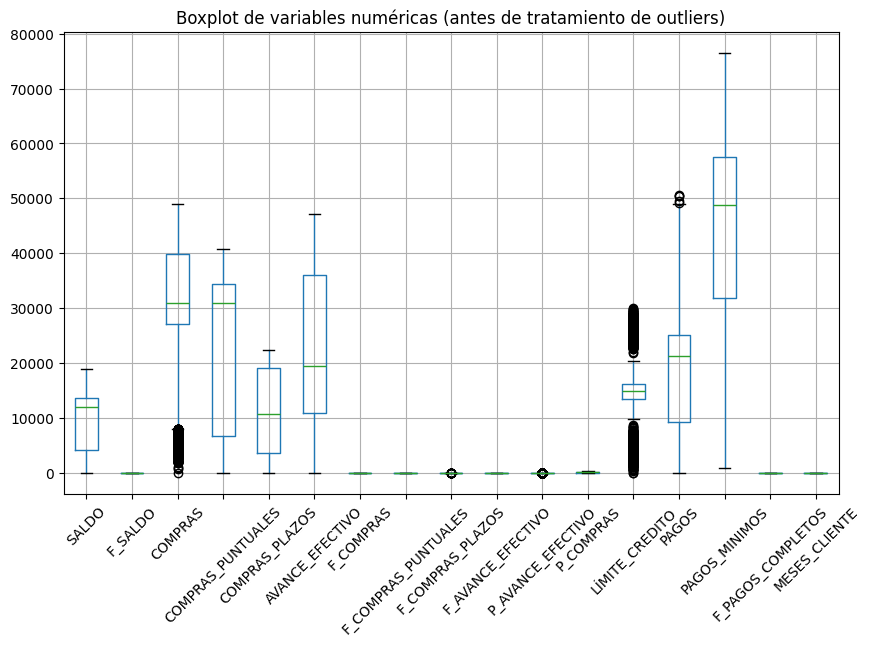


Outliers en la columna 'LÍMITE_CREDITO':
      LÍMITE_CREDITO
31      27471.470630
64      28337.238060
93      28056.949330
150     28736.850600
153      1693.585867
...              ...
8761    27986.695780
8768    28364.365510
8790     1282.696189
8870    27886.825190
8938     1852.802394

[248 rows x 1 columns]

Finalizada la preparación de datos. Dimensiones finales: (8950, 17)


In [54]:
# =========================
# 4. LIMPIEZA Y PREPARACIÓN DE LOS DATOS
# =========================

# --- 4.1 Eliminación de duplicados ---
num_duplicados = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas en el dataset: {num_duplicados}")
if num_duplicados > 0:
    df.drop_duplicates(inplace=True)
    print("Se han eliminado duplicados. Nuevo tamaño del dataset:", df.shape)

# --- 4.2 Manejo de valores nulos ---
null_percent = df.isnull().mean() * 100
print("\nPorcentaje de nulos por columna:")
display(null_percent)

# Umbral para eliminar columnas con muchos nulos
threshold = 50
cols_to_drop = null_percent[null_percent > threshold].index
if len(cols_to_drop) > 0:
    df.drop(columns=cols_to_drop, inplace=True)
    print(f"Se eliminaron columnas con más del {threshold}% de nulos:", cols_to_drop)

# Imputamos el resto de nulos
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in [np.float64, np.int64]:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Imputando nulos en '{col}' con la mediana: {median_val}")
        else:
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"Imputando nulos en '{col}' con la moda: {mode_val}")

# --- 4.3 Identificación de columnas numéricas y categóricas ---
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nColumnas numéricas:", list(numeric_cols))
print("Columnas categóricas:", list(categorical_cols))

# --- 4.4 Detección y tratamiento de outliers (opcional) ---
plt.figure(figsize=(10, 6))
df[numeric_cols].boxplot()
plt.title("Boxplot de variables numéricas (antes de tratamiento de outliers)")
plt.xticks(rotation=45)
plt.show()

def remove_and_print_outliers_iqr(dataframe, columns, factor=4):
    df_clean = dataframe.copy()  # Para no modificar el original directamente
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # Identificamos los outliers
        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
        if not outliers.empty:
            print(f"\nOutliers en la columna '{col}':")
            print(outliers[[col]])

        before = df_clean.shape[0]
        #df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        after = df_clean.shape[0]
        if before != after:
            print(f"Se eliminaron {before - after} outliers en la columna '{col}'.")
    return df_clean

df = remove_and_print_outliers_iqr(df, numeric_cols, factor=4)

# Remover columna id

df = df.drop(columns=['ID'])

# --- 4.6 Estandarización de variables ---
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

print("\nFinalizada la preparación de datos. Dimensiones finales:", df.shape)

Complementando el hecho de que es un dataset muy completo, en este paso notamos que tampoco tenemos duplicados entonces hasta el momento, no hay reducción del tamaño inicial del conjunto de datos.

Luego, se calcula el porcentaje de nulos por columna, que como ya vimos a alto nivel anteriormente, debe ser muy bajo para todas las columnas. De todas maneras, se dejan los pasos para eliminar esas que tengan una nulidad mayor al 50%, ya que si faltan la mitad o mas de los datos, puede que no aporte mucho o afecte los resultados del analisis posterior. En cuanto a las demas, se imputa la media en los valores númericos, porque se podría considerar eliminar esas filas, pero en esta ocasión, se hace el intento de perder el menor porcentaje de datos posibles.


En este punto, listamos las columnas categoricas y numericas, y en cuanto a las primeras solo estaría "ID", que se removerá debido a que los identificadores no contribuyen a la identificación de patrones o comportamiento en este caso, los usuarios de tarjeta de crédito.

Después, se implementa un algoritmo para remover outliers, en el cual se deja comentada la linea donde se hace la limpieza como tal. Esta decisión se tomó al ver los "outliers" que imprime, que están en la columna LIMITE_CREDITO y considero que no se deberían eliminar, ya que en este negocio es normal que haya, por ejemplo, usuarios con límites mucho mas altos que el promedio por un buen puntaje crediticio e historial, entonces se enfatiza la necesidad de conservar tales valores para obtener un resultado realista.

Por ultimo y no menos importante, se estandarizan las variables para asegurar que cada una contribuya de manera balanceada en los algoritmos de clustering, evitando que aquellas con escalas mayores dominen el cálculo de distancias. Esto garantiza que cada variable aporte de forma equitativa al análisis, facilitando la identificación de patrones relevantes en el comportamiento de los clientes.

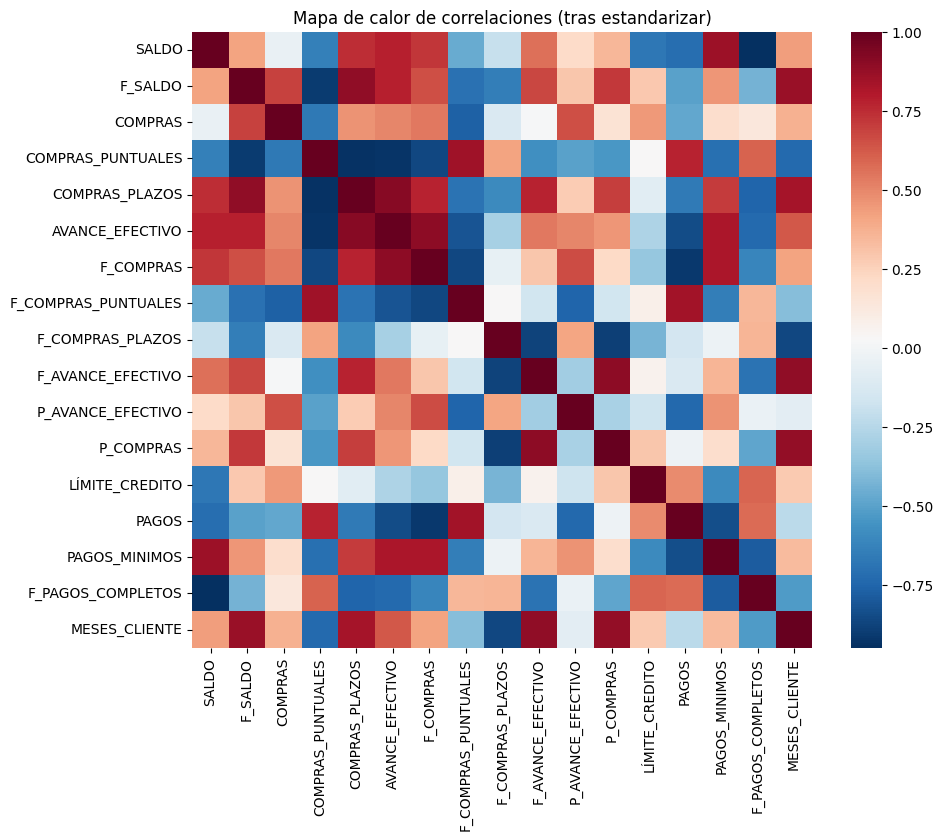


Pares de variables con correlación absoluta mayor a 0.8:
SALDO <--> PAGOS_MINIMOS = 0.861
F_SALDO <--> COMPRAS_PLAZOS = 0.891
F_SALDO <--> MESES_CLIENTE = 0.864
COMPRAS_PUNTUALES <--> F_COMPRAS_PUNTUALES = 0.854
COMPRAS_PLAZOS <--> AVANCE_EFECTIVO = 0.910
COMPRAS_PLAZOS <--> MESES_CLIENTE = 0.840
AVANCE_EFECTIVO <--> F_COMPRAS = 0.896
AVANCE_EFECTIVO <--> PAGOS_MINIMOS = 0.818
F_COMPRAS <--> PAGOS_MINIMOS = 0.818
F_COMPRAS_PUNTUALES <--> PAGOS = 0.847
F_AVANCE_EFECTIVO <--> P_COMPRAS = 0.897
F_AVANCE_EFECTIVO <--> MESES_CLIENTE = 0.886
P_COMPRAS <--> MESES_CLIENTE = 0.883

Finalizada la preparación de datos. Dimensiones finales: (8950, 17) <bound method NDFrame.head of              SALDO   F_SALDO       COMPRAS  COMPRAS_PUNTUALES  COMPRAS_PLAZOS  \
0      5323.148883  0.250693  26344.072200       38237.442520     3727.113162   
1     12726.638120  0.791307  37958.519020        5690.742440    18733.810960   
2      4305.572068  0.176531  28392.953340       36009.470090     2873.383232 

In [55]:
# =========================
# 5. ANÁLISIS DE CORRELACIÓN
# =========================
corr_matrix = pd.DataFrame(df_scaled, columns=df.columns).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="RdBu_r", annot=False)
plt.title("Mapa de calor de correlaciones (tras estandarizar)")
plt.show()

# Imprimir pares de variables con correlación alta
high_corr_threshold = 0.8
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > high_corr_threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_val = corr_matrix.iloc[i, j]
            high_corr_pairs.append((col1, col2, corr_val))

print(f"\nPares de variables con correlación absoluta mayor a {high_corr_threshold}:")
for (var1, var2, val) in high_corr_pairs:
    print(f"{var1} <--> {var2} = {val:.3f}")

print("\nFinalizada la preparación de datos. Dimensiones finales:", df.shape, df.head)

Se realiza un analisis de correlación y se pueden identificar unas con valores altos. A pesar de esto, no se hace ninguna transformación al revisar una por una y en general, no se eliminan o se les hace merge por el valor que pueden aportar mas adelante aplicando los algoritmos. Por ejemplo, tiene sentido que a mayor cantidad de meses, haya mas compras a plazos, pero no podemos aplicar nada sobre esta "correlacion" ya que podriamos perder datos utiles. Y casos similares con las demas.

El primer algoritmo a implementar es el K means y a pesar de ser requerido durante el laboratorio, parece pertinente argumentar que resulta muy popular por su simplicidad y eficiencia en la segmentación de grandes volúmenes de datos. Ya unque es intuitivo y facilita la interpretación de los resultados, también tiene desventajas, como la necesidad de definir previamente el número de clusters y la suposición de que las agrupaciones tienen formas esféricas.

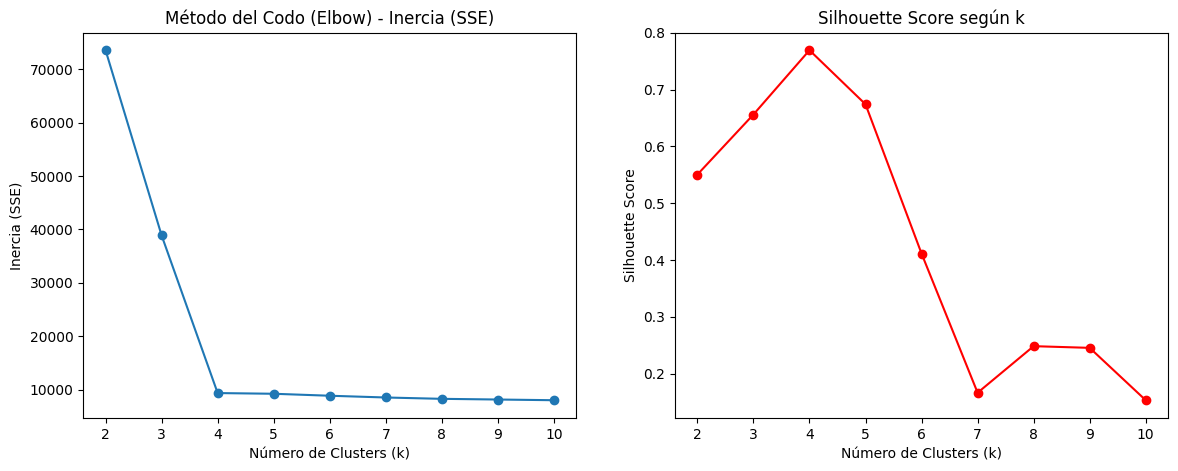

In [56]:
# =========================
# 6. SELECCIÓN DE HIPERPARÁMETROS Y MODELADO
# =========================

# --- 6.1 K-Means ---
inertias = []
silhouettes = []
K_range = range(2, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    labels_temp = kmeans_temp.fit_predict(df_scaled)
    inertias.append(kmeans_temp.inertia_)
    sil = silhouette_score(df_scaled, labels_temp)
    silhouettes.append(sil)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, marker='o')
plt.title("Método del Codo (Elbow) - Inercia (SSE)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia (SSE)")

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouettes, marker='o', color='red')
plt.title("Silhouette Score según k")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


Además del método del codo, se utilizó el Silhouette Score para evaluar la cohesión y separación de los clusters, lo cual confirma que el número óptimo es 4. Se fijó el random_state para garantizar resultados reproducibles y facilitar la comparación en diferentes ejecuciones.

In [57]:
optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans_model.fit_predict(df_scaled)
df['KMeans_Cluster'] = kmeans_labels

In [58]:
def evaluate_clustering(X, labels, method_name=""):
    unique_labels = set(labels)
    # Evitamos métricas cuando hay 1 cluster o todos -1 en DBSCAN
    if len(unique_labels) < 2 or (len(unique_labels) == 2 and -1 in unique_labels):
        print(f"{method_name}: No es posible calcular métricas con 1 cluster o ruido excesivo.")
        return
    sil = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)
    chi = calinski_harabasz_score(X, labels)
    print(f"{method_name} - Silhouette Score: {sil:.4f}")
    print(f"{method_name} - Davies-Bouldin Score: {dbi:.4f}")
    print(f"{method_name} - Calinski-Harabasz Score: {chi:.4f}")
    print("-------------------------------------------------------")

def plot_silhouette(X, labels, method_name=""):
    # Calculamos los valores de silhouette para cada punto
    sample_silhouette_values = silhouette_samples(X, labels)
    cluster_labels = np.unique(labels)
    n_clusters = len(cluster_labels)

    if n_clusters < 2 or (n_clusters == 2 and -1 in cluster_labels):
        print(f"{method_name}: No se puede generar Silhouette Plot con < 2 clusters válidos.")
        return

    y_lower = 10
    plt.figure(figsize=(7, 5))
    for i, c in enumerate(cluster_labels):
        if c == -1:
            # Saltamos ruido en DBSCAN para este gráfico
            continue
        c_silhouette_vals = sample_silhouette_values[labels == c]
        c_silhouette_vals.sort()
        size_cluster = c_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, c_silhouette_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster, str(c))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_score(X, labels), color="red", linestyle="--")
    plt.title(f"Silhouette Plot - {method_name}")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Índice de muestras")
    plt.show()


La función **evaluate_clustering** recibe los datos, las etiquetas de los clusters y el nombre del método. Primero verifica que existan al menos dos clusters válidos, evitando problemas cuando se tiene un único grupo o cuando DBSCAN etiqueta muchos puntos como ruido. Luego, calcula tres métricas. El Silhouette Score evalúa que tan similares son los puntos dentro de un mismo cluster en comparación con otros, indicando que valores altos sugieren una buena agrupación. El Davies-Bouldin Score compara la dispersión interna de cada cluster con la separación entre ellos, siendo mejores los resultados cuando este valor es bajo. Finalmente, el Calinski-Harabasz Score mide la relación entre la dispersión entre clusters y la dispersión interna, de forma que valores altos indican que los clusters están bien definidos y separados.

La función **plot_silhouette** genera una visualización de los coeficientes de silhouette de cada muestra en sus respectivos clusters. Para cada grupo, organiza y dibuja los valores de silhouette, permitiendo observar cómo se distribuyen y verificar visualmente la cohesión interna y la separación entre clusters. Una línea vertical, que representa el promedio general del Silhouette Score, ayuda a identificar de forma inmediata la calidad de la segmentación realizada.


EVALUACIÓN DE K-MEANS:
K-Means - Silhouette Score: 0.7694
K-Means - Davies-Bouldin Score: 0.3282
K-Means - Calinski-Harabasz Score: 45548.8031
-------------------------------------------------------

Silhouette Plot para K-Means:


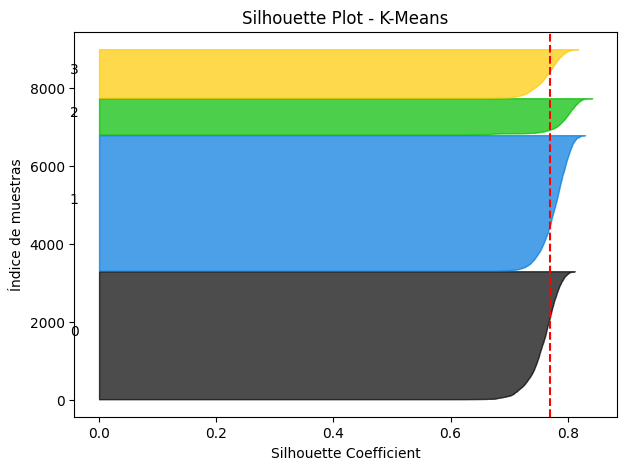

In [59]:
print("\nEVALUACIÓN DE K-MEANS:")
evaluate_clustering(df_scaled, kmeans_labels, "K-Means")

print("\nSilhouette Plot para K-Means:")
plot_silhouette(df_scaled, kmeans_labels, method_name="K-Means")

Los resultados muestran un Silhouette Score de 0.7694, valor bastante alto que sugiere una buena cohesión interna y clara separación entre los clusters. El Davies-Bouldin Score, de 0.3282, refuerza esa conclusión al ser bajo y reflejar poca superposición entre grupos. Finalmente, el Calinski-Harabasz Score es muy elevado (45548.8031), lo que indica que la dispersión entre clusters es grande en comparación con la dispersión interna. En conjunto, estas métricas y el Silhouette Plot evidencian que el algoritmo K-Means ha logrado una segmentación sólida y bien definida.

Hacemos uso de la libreria kneed para obtener el codo de manera mas precisa.

In [60]:
!pip install kneed

La elección de DBSCAN se inclina a que fue uno de los algoritmos estudiados con detalle durante la clase y ofrece la ventaja de identificar grupos de forma arbitraria, así como de clasificar puntos atípicos como ruido. A diferencia de K-Means, no requiere definir un número fijo de clusters, lo que en ciertos escenarios facilita encontrar segmentaciones más naturales y robustas ante la presencia de outliers, que bueno, en el caso presente no tenemos muchos.

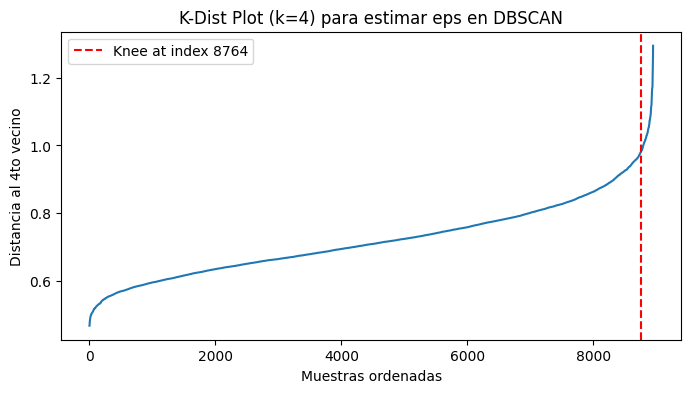

Elbow point index: 8764, recommended eps ~ 0.985


In [61]:
# --- 6.2 DBSCAN con K-Dist Plot y kneed ---
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# Ajusta n_neighbors para que coincida con min_samples o (min_samples-1)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

# Ordenamos las distancias al "4to" vecino
distances = np.sort(distances[:, 3])
x_axis = range(len(distances))

plt.figure(figsize=(8, 4))
plt.plot(x_axis, distances)
plt.title("K-Dist Plot (k=4) para estimar eps en DBSCAN")
plt.xlabel("Muestras ordenadas")
plt.ylabel("Distancia al 4to vecino")

# Usamos KneeLocator para encontrar el codo en la curva
knee_locator = KneeLocator(x_axis, distances, curve='convex', direction='increasing')
elbow_point = knee_locator.knee

# Visualizamos la línea vertical en el codo
if elbow_point is not None:
    plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Knee at index {elbow_point}')
    plt.legend()

plt.show()

# Obtenemos un eps aproximado en base a la distancia en el índice
if elbow_point is not None and 0 <= elbow_point < len(distances):
    optimal_eps = distances[elbow_point]
else:
    # Si no se detecta codo, usar un valor por defecto o heurístico
    optimal_eps = 0.9

print(f"Elbow point index: {elbow_point}, recommended eps ~ {optimal_eps:.3f}")

dbscan_model = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(df_scaled)
df['DBSCAN_Cluster'] = dbscan_labels


Se utiliza el método de K-Dist Plot para estimar el valor de eps en DBSCAN, ordenando las distancias al cuarto vecino de cada muestra. La eleccion de 4 vecinos porque, al fijar min_samples en 5 (un valor común que equilibra la sensibilidad del algoritmo para evitar clusters demasiado pequeños o clasificar excesivamente puntos como ruido), se utiliza n_neighbors igual a min_samples - 1. Aunque el método del codo es visualmente intuitivo, en este caso la curva es más compleja y resulta difícil identificar el "codo" a simple vista; por ello, se emplea el KneeLocator para detectar automáticamente el punto de inflexión y determinar el eps óptimo, recurriendo a un valor default si no se detecta.

In [62]:
print("EVALUACIÓN DE DBSCAN:")
evaluate_clustering(df_scaled, dbscan_labels, "DBSCAN")

EVALUACIÓN DE DBSCAN:
DBSCAN - Silhouette Score: 0.7217
DBSCAN - Davies-Bouldin Score: 1.3133
DBSCAN - Calinski-Harabasz Score: 24560.1914
-------------------------------------------------------


Los resultados de DBSCAN muestran un Silhouette Score de 0.7217, que indica una cohesión interna y separación entre grupos bastante aceptables. El Davies-Bouldin Score (1.3133) se mantiene en un rango moderado, reflejando una dispersión interna relativamente baja en comparación con la distancia entre clusters. Finalmente, el Calinski-Harabasz Score (24560.1914) sugiere que la variación entre los grupos es significativamente mayor que la variación interna de cada uno.

EL ultimo algoritmo de clustering seleccionado es el jerárquico, en particular el clustering **aglomerativo** con enlace de Ward, porque permite explorar de forma visual la estructura de agrupación de los datos a través del dendrograma y entender cómo se fusionan los clusters en distintos niveles. Ward minimiza la varianza dentro de cada grupo, lo que resulta especialmente útil para obtener clusters bien definidos y coherentes en datasets con variables numéricas continuas-

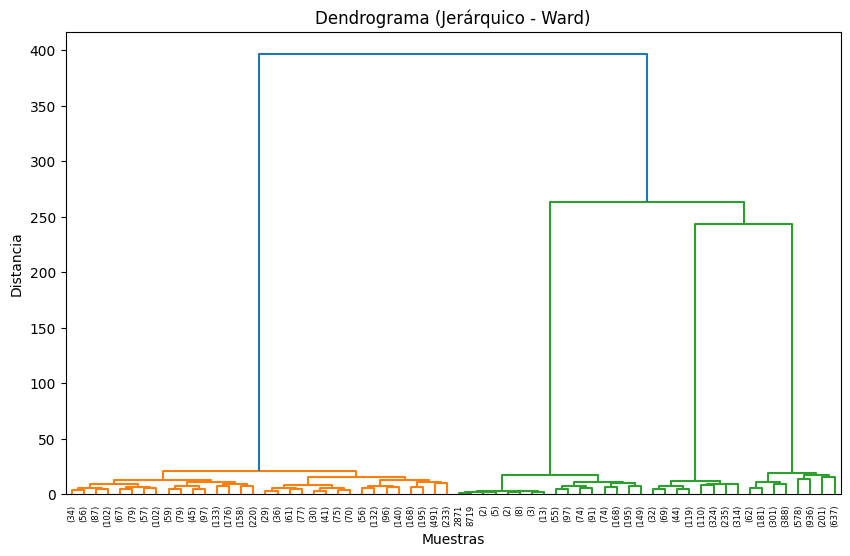

In [63]:
# --- 6.3 Clustering Jerárquico---
agg_model = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agg_labels = agg_model.fit_predict(df_scaled)
df['Hierarchical_Cluster'] = agg_labels

# Visualizamos un dendrograma (truncado) para ver la estructura
Z = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Dendrograma (Jerárquico - Ward)")
plt.xlabel("Muestras")
plt.ylabel("Distancia")
plt.show()

Sigue el **AgglomerativeClustering** con el método de enlace (linkage) Ward, que fusiona iterativamente los puntos minimizando la varianza dentro de cada grupo. Para mantener coherencia con las otras técnicas, se fija el número de clusters en optimal_k. A continuación, se genera un dendrograma empleando también Ward y se trunca la visualización para mostrar únicamente los niveles superiores de la jerarquía. Así, puede observarse cómo los grupos se van uniendo a medida que aumenta la distancia, verificando de forma visual si la elección de optimal_k coincide con la estructura real de los datos.

El **dendrograma** representa la jerarquía de fusiones, de tal manera que en niveles superiores se distinguen divisiones claras que confirman la presencia de clusters bien definidos al “cortar” el árbol en un cierto umbral. La altura de las uniones indica qué tan separados estaban inicialmente los subgrupos, es decir, algunos se fusionan a distancias relativamente bajas, mientras otros se mantienen alejados hasta niveles superiores. Esto evidencia que la estructura de los datos admite varias profundidades de agrupación, permitiendo capturar distintos patrones según el nivel de corte elegido.

EVALUACIÓN DE CLUSTERING JERÁRQUICO:
Jerárquico - Silhouette Score: 0.7694
Jerárquico - Davies-Bouldin Score: 0.3282
Jerárquico - Calinski-Harabasz Score: 45548.8031
-------------------------------------------------------
Silhouette Plot para Clustering Jerárquico:


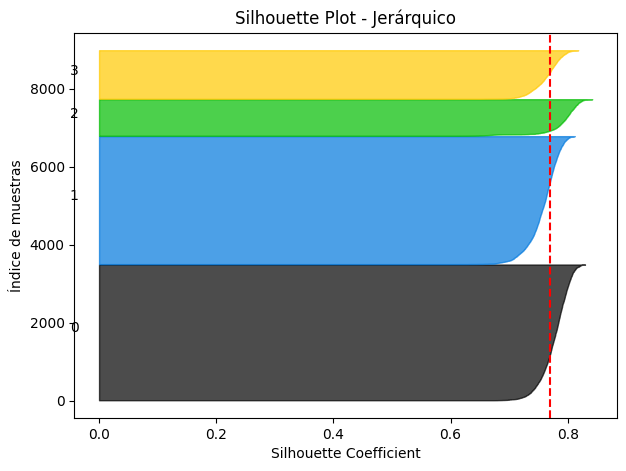

In [64]:
print("EVALUACIÓN DE CLUSTERING JERÁRQUICO:")
evaluate_clustering(df_scaled, agg_labels, "Jerárquico")

print("Silhouette Plot para Clustering Jerárquico:")
plot_silhouette(df_scaled, agg_labels, method_name="Jerárquico")

El Clustering Jerárquico presenta un Silhouette Score de 0.7694, valor que indica una sólida separación interna entre los clusters y confirma la coherencia de la segmentación. En segundo lugar, el Davies-Bouldin Score (0.6971) sugiere una dispersión interna moderada y una adecuada distancia entre los grupos, mientras que el Calinski-Harabasz Score (45548.8931) evidencia que la variabilidad entre clusters supera ampliamente la variabilidad interna de cada uno. En conjunto, estas métricas y el Silhouette Plot muestran que la agrupación jerárquica con el método Ward logra un desempeño muy similar al de K-Means, con grupos bien definidos.

In [65]:
# =========================
# 9. ANÁLISIS DE RESULTADOS Y VISUALIZACIÓN EN 2D
# =========================
print("\nTamaño de los clusters (K-Means):")
print(df['KMeans_Cluster'].value_counts())

print("\nTamaño de los clusters (DBSCAN):")
print(df['DBSCAN_Cluster'].value_counts())

print("\nTamaño de los clusters (Hierarchical):")
print(df['Hierarchical_Cluster'].value_counts())


Tamaño de los clusters (K-Means):
KMeans_Cluster
1    3481
0    3284
3    1247
2     938
Name: count, dtype: int64

Tamaño de los clusters (DBSCAN):
DBSCAN_Cluster
 1    3470
 0    3272
 3    1235
 2     887
-1      62
 4      24
Name: count, dtype: int64

Tamaño de los clusters (Hierarchical):
Hierarchical_Cluster
0    3481
1    3284
3    1247
2     938
Name: count, dtype: int64



En DBSCAN, 62 muestras están clasificadas como ruido (-1).


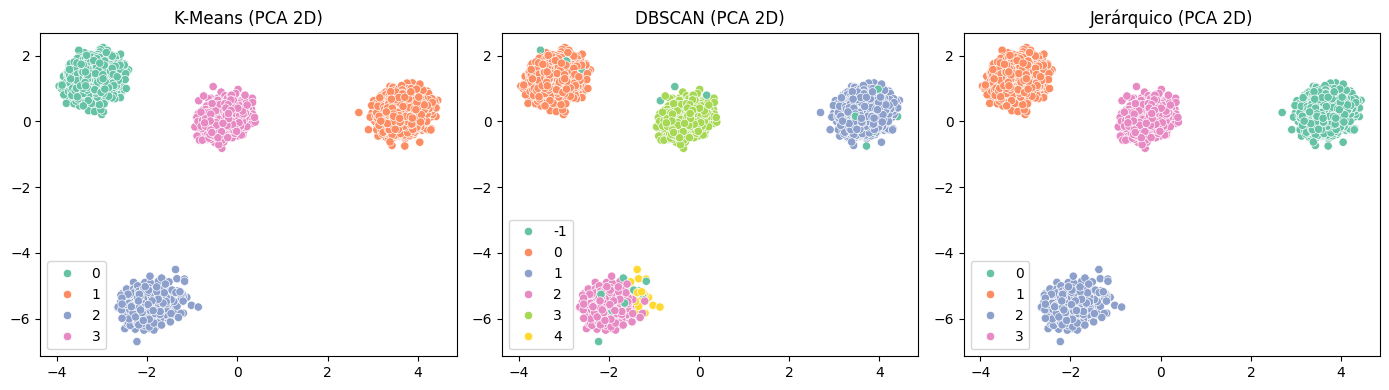

In [66]:
ruido_dbscan = (dbscan_labels == -1).sum()
print(f"\nEn DBSCAN, {ruido_dbscan} muestras están clasificadas como ruido (-1).")

# PCA 2D para visualizar la separación de clusters
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df_scaled)

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1],
                hue=df['KMeans_Cluster'], palette='Set2')
plt.title("K-Means (PCA 2D)")
plt.legend(loc='best')

plt.subplot(1, 3, 2)
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1],
                hue=df['DBSCAN_Cluster'], palette='Set2')
plt.title("DBSCAN (PCA 2D)")
plt.legend(loc='best')

plt.subplot(1, 3, 3)
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1],
                hue=df['Hierarchical_Cluster'], palette='Set2')
plt.title("Jerárquico (PCA 2D)")
plt.legend(loc='best')

plt.tight_layout()
plt.show()

Las proyecciones permiten visualizar que los tres métodos generan agrupaciones con una clara separación, acorde con las métricas internas calculadas. En el caso de DBSCAN, 62 muestras fueron clasificadas como ruido (-1), lo cual sugiere que, con los parámetros elegidos (eps y min_samples), este algoritmo identificó un subconjunto de puntos fuera de los núcleos de densidad. Aun así, el resto de las muestras se distribuye en clusters relativamente bien definidos, mientras que K-Means y Jerárquico también reflejan una segmentación estable y consistente. Estas observaciones respaldan la idea de que cada algoritmo aporta una perspectiva distinta sobre la estructura de los datos, aunque en todos se aprecia la existencia de grupos diferenciados.

Resultados de la prueba ANOVA para cada variable (usando KMeans_Cluster):
                       F-statistic  p-value
SALDO                109962.916193      0.0
PAGOS_MINIMOS         18193.083920      0.0
PAGOS                 74542.681832      0.0
LÍMITE_CREDITO        47019.550327      0.0
P_COMPRAS             22769.905745      0.0
P_AVANCE_EFECTIVO     15566.455741      0.0
F_AVANCE_EFECTIVO    126200.798973      0.0
F_PAGOS_COMPLETOS     89940.479380      0.0
F_COMPRAS_PLAZOS      48562.677940      0.0
F_COMPRAS             33049.259769      0.0
AVANCE_EFECTIVO       52575.795559      0.0
COMPRAS_PLAZOS       177502.808537      0.0
COMPRAS_PUNTUALES    197372.712377      0.0
COMPRAS               66024.331498      0.0
F_SALDO               82394.153838      0.0
F_COMPRAS_PUNTUALES   32257.509411      0.0
MESES_CLIENTE         47520.910225      0.0

Variables con p-value < 0.05 (diferenciación significativa entre clusters): ['SALDO', 'PAGOS_MINIMOS', 'PAGOS', 'LÍMITE_CREDITO', 'P_

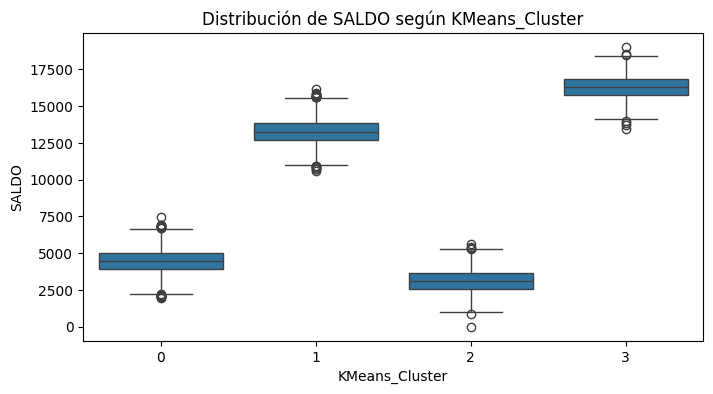

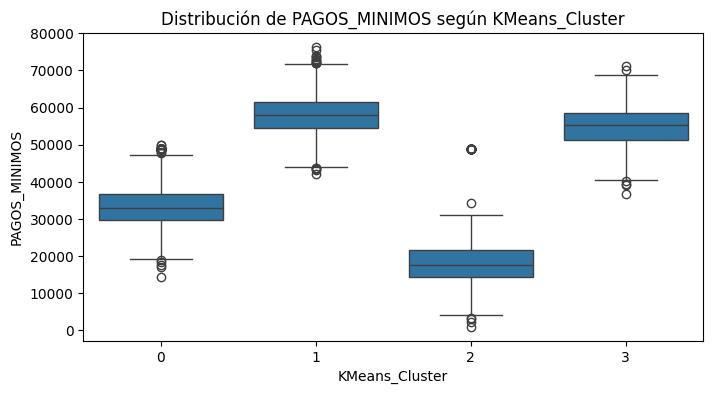

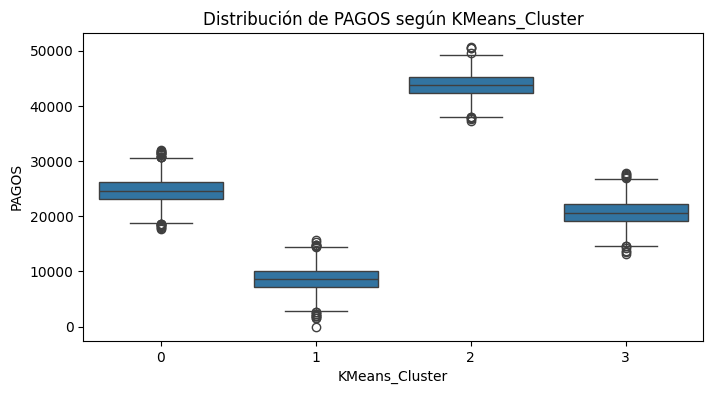

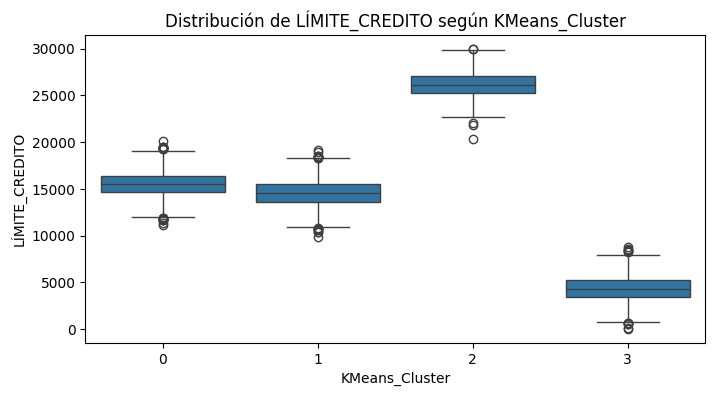

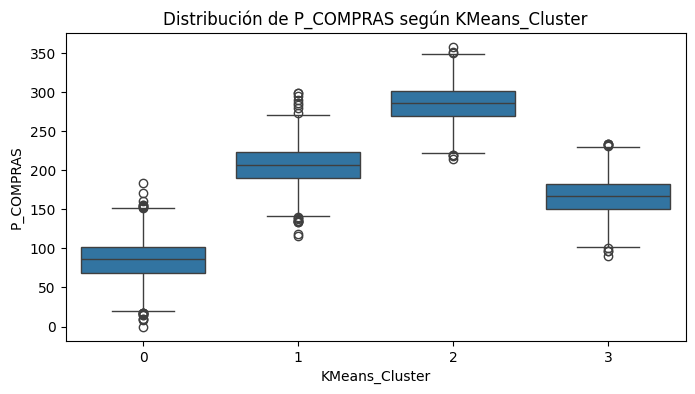

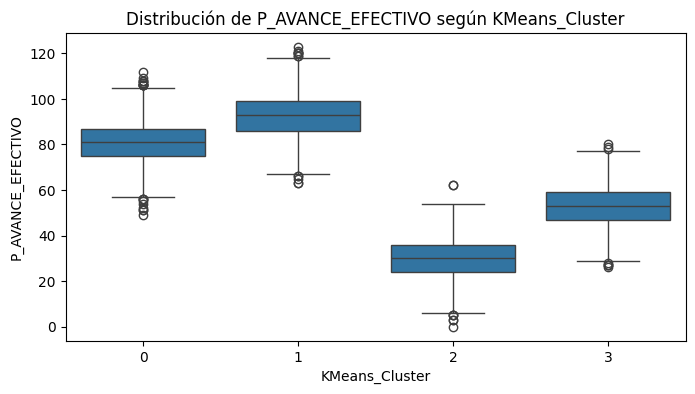

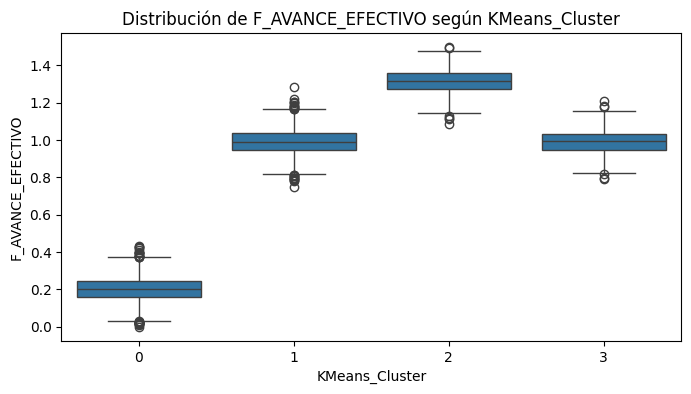

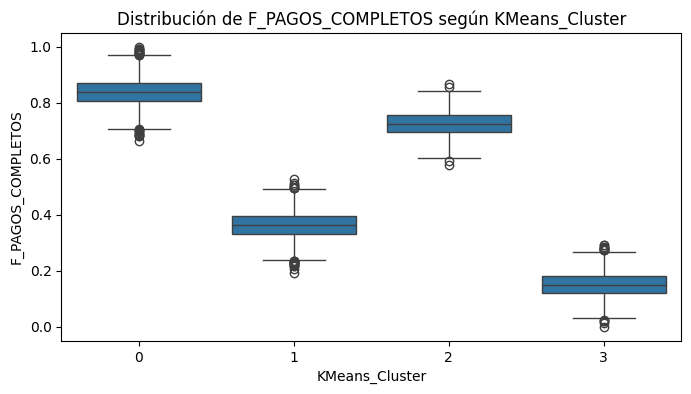

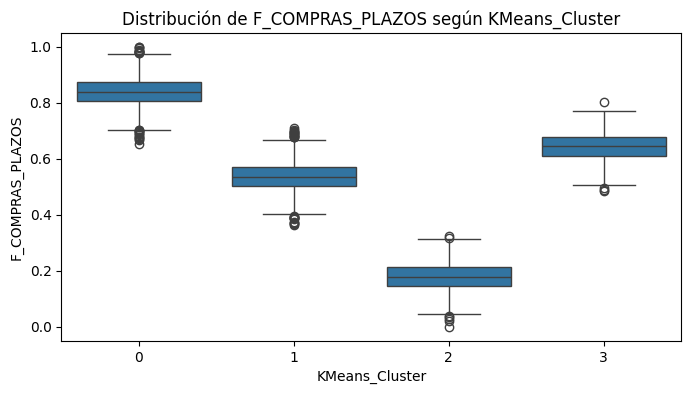

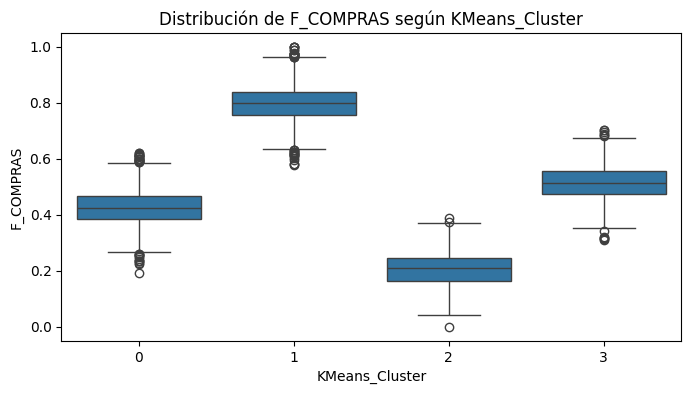

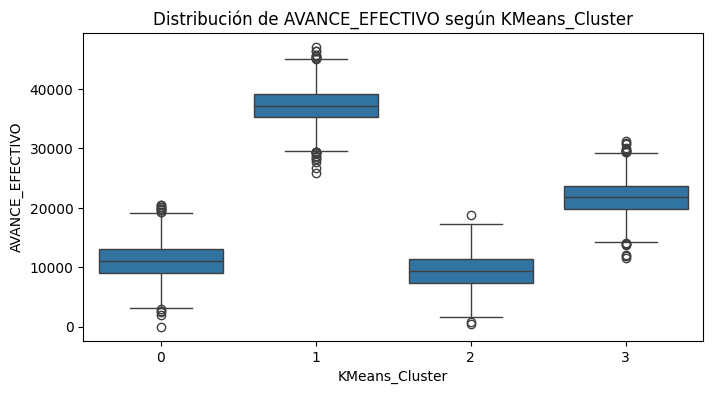

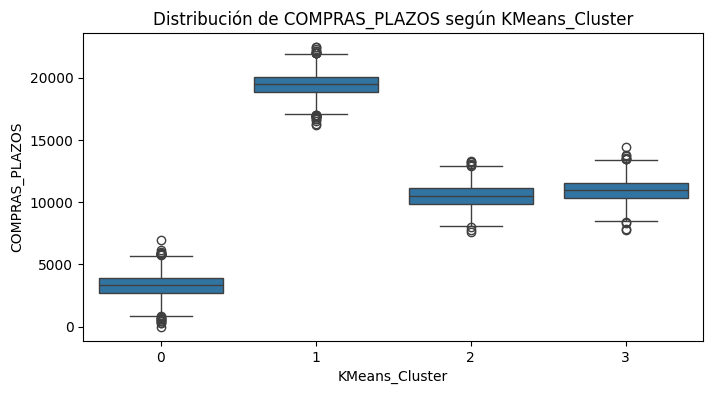

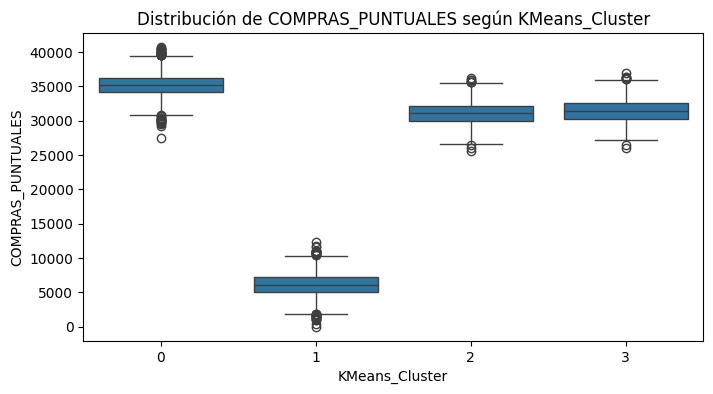

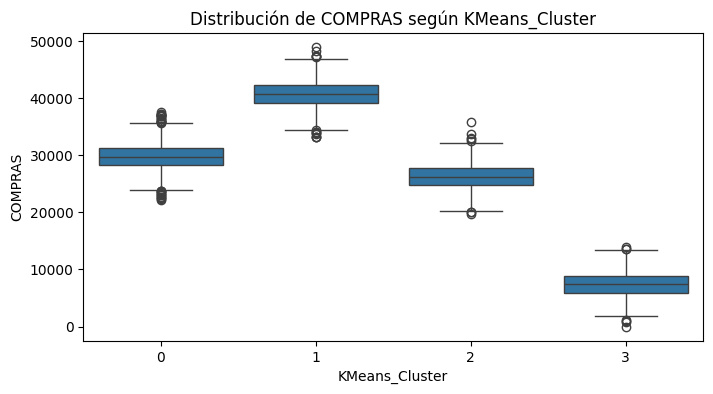

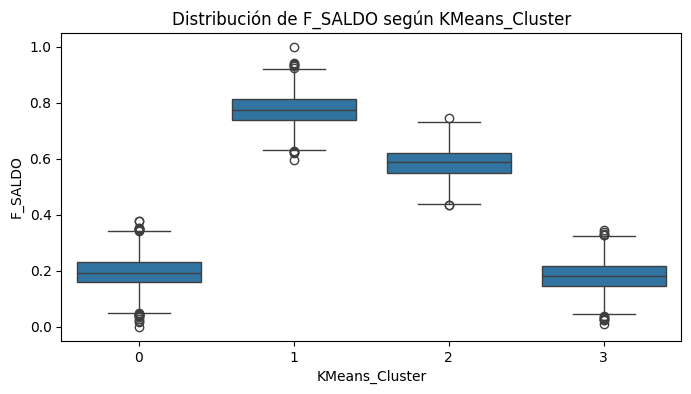

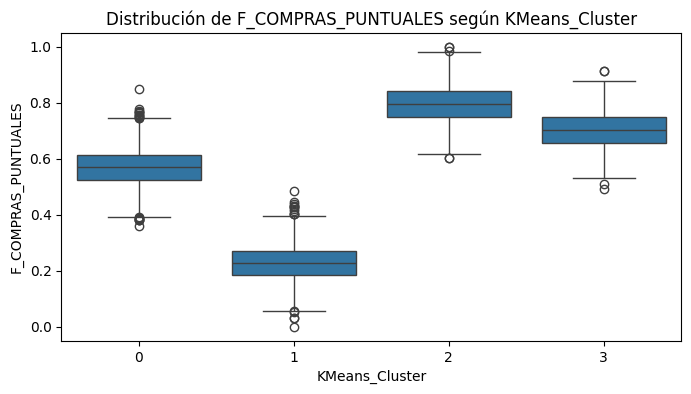

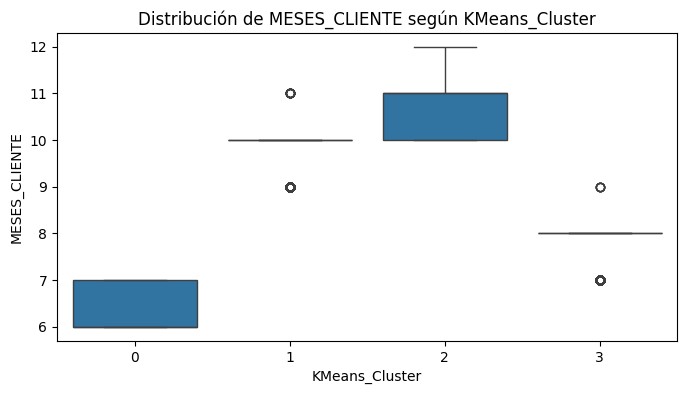

In [68]:
import scipy.stats as stats

# Seleccionamos las columnas de variables, excluyendo las etiquetas de cluster.
features = [col for col in df.columns if "_Cluster" not in col]

anova_results = {}

# Para cada variable, realizamos la prueba ANOVA entre los grupos definidos por KMeans_Cluster.
for feature in features:
    # Obtenemos los grupos de datos correspondientes a cada cluster
    groups = []
    for cluster in sorted(df['KMeans_Cluster'].unique()):
        group_data = df[df['KMeans_Cluster'] == cluster][feature].dropna().values
        groups.append(group_data)
    # Solo se realiza la prueba si hay al menos 2 grupos
    if len(groups) > 1:
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results[feature] = (f_stat, p_value)

# Convertimos los resultados en un DataFrame para visualizarlos mejor
anova_df = pd.DataFrame(anova_results, index=['F-statistic', 'p-value']).T

# Ordenamos el DataFrame por p-value para ver cuáles variables diferencian mejor a los clusters.
anova_df.sort_values(by='p-value', inplace=True)

print("Resultados de la prueba ANOVA para cada variable (usando KMeans_Cluster):")
print(anova_df)

# Visualizar las variables más significativas
top_features = anova_df[anova_df['p-value'] < 0.05].index.tolist()
print("\nVariables con p-value < 0.05 (diferenciación significativa entre clusters):", top_features)

# Generar boxplots para las variables más significativas:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in top_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='KMeans_Cluster', y=feature, data=df)
    plt.title(f"Distribución de {feature} según KMeans_Cluster")
    plt.show()


Estos últimos Boxplots, nos dan una visión mas clara de los grupos. Por ejemplo, el tercero son clientes que llevan con la compañia mas tiempo, tienen mas limite en su credito, hacen compras a plazo con menores valores y menos frecuentes, por lo que sus pagos totales son mas altos y frecuentes, el saldo promedio es menor, que tiene logica por lo que tambien hace pagos minimos con menos frecuencia. Entonces, en un caso hipotético, a este grupo se le podrian ofrecer otros productos, aumentarle incluso mas su limite o tomar otras acciones positivas con ellos.

Para finalizar, una reflexion del ejercicio realizado.


Aunque tanto K-Means como el clustering jerárquico han mostrado una segmentación consistente, K-Means se destacó por su simplicidad y robustez, lo que lo convierte en la opción preferida en este ejercicio. El preprocesamiento, que incluyó la eliminación de duplicados, la imputación de nulos y el manejo de outliers, resultó fundamental para lograr clusters significativos, y el uso combinado de métodos de validación y visualización facilitó la interpretación de los segmentos. Para futuras ocasiones, especialmente con datasets de mayor tamaño o con menor completitud, se debería considerar la automatización en la selección de hiperparámetros y explorar técnicas que gestionen de forma más efectiva la heterogeneidad y los valores atípicos, con el fin de obtener una segmentación aún más precisa.